# Encoder test bed

In [79]:
%reload_ext autoreload
%autoreload all

%aimport -torch
%aimport -matplotlib
%aimport -seaborn
%aimport -numpy
%aimport -pandas
%aimport -scipy
%aimport -lightning 

## Load the dataset

In [80]:
from torch.utils.data import DataLoader

from dataset.seizure import CHBMITPreprocessedDataset

# Load the dataset
dataset = CHBMITPreprocessedDataset('CHB-MIT/processed_data.h5')

data_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

## Create utils

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch


def plot_coding(original_data: torch.Tensor, spike_data: torch.Tensor, decoded_data: torch.Tensor):
    max_len = max(original_data.shape[0], spike_data.shape[0], decoded_data.shape[0])

    figs, axes = plt.subplots(3, 1, figsize=(10, 8))
    figs.set_tight_layout(True)
    axes[0].set_title("Encoded Spike Train")
    axes[0].set_xlabel("Timesteps")
    axes[0].set_ylabel("Spike")
    axes[0].set_xlim(0, max_len)
    axes[0].stem(spike_data, markerfmt="none")

    axes[1].set_title("Original Signal")
    axes[1].set_xlabel("Timesteps")
    axes[1].set_ylabel("Amplitude")
    axes[1].set_xlim(0, max_len)
    sns.lineplot(original_data, ax=axes[1])

    axes[2].set_title("Decoded Signal")
    axes[2].set_xlabel("Timesteps")
    axes[2].set_ylabel("Amplitude")
    axes[2].set_xlim(0, max_len)
    sns.lineplot(decoded_data, ax=axes[2])

## Get the dataset

In [82]:
test_data, test_label = next(iter(data_loader))

## Load the encoder

In [83]:
from encoder import PoissonEncoderExpand

p_encoder = PoissonEncoderExpand(interval_freq=4, random_seed=24, normalize=False)
encoded_data = p_encoder.encode(test_data)
decoded_rate = p_encoder.decode(encoded_data)

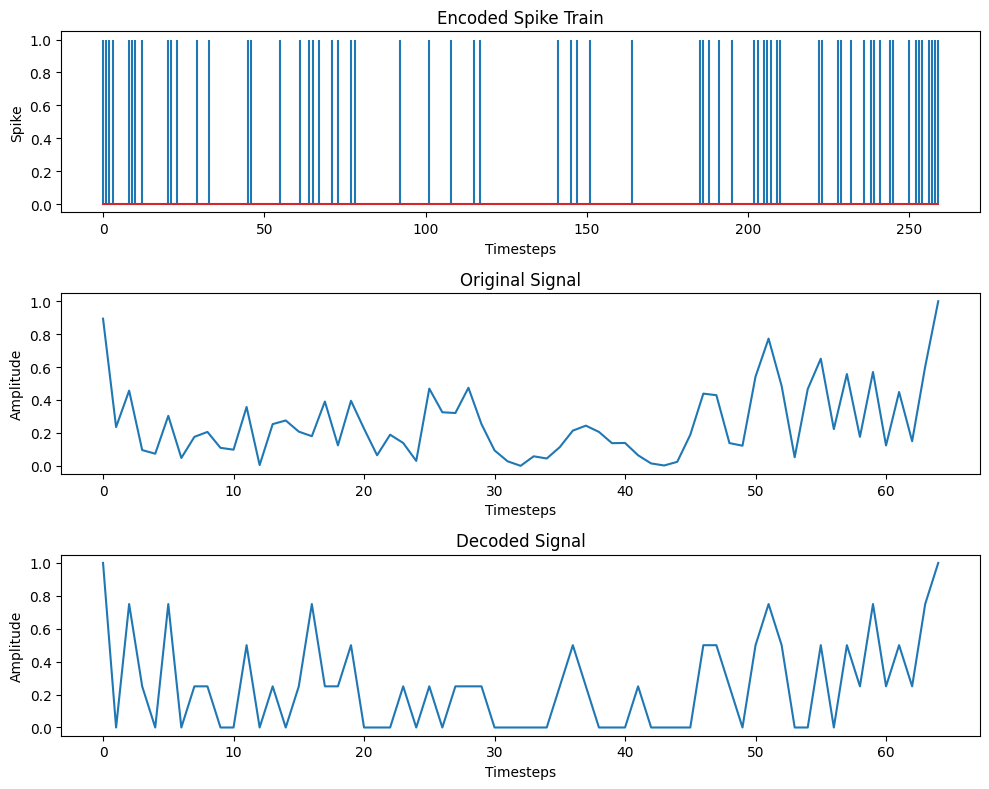

In [84]:
plot_coding(test_data[0,0,0,:], encoded_data[0,0,0,:], decoded_rate[0,0,0,:])

In [85]:
from encoder import PoissonEncoder

p_encoder = PoissonEncoder(interval_freq=4, random_seed=24, normalize=False)
encoded_data = p_encoder.encode(test_data)
decoded_rate = p_encoder.decode(encoded_data)

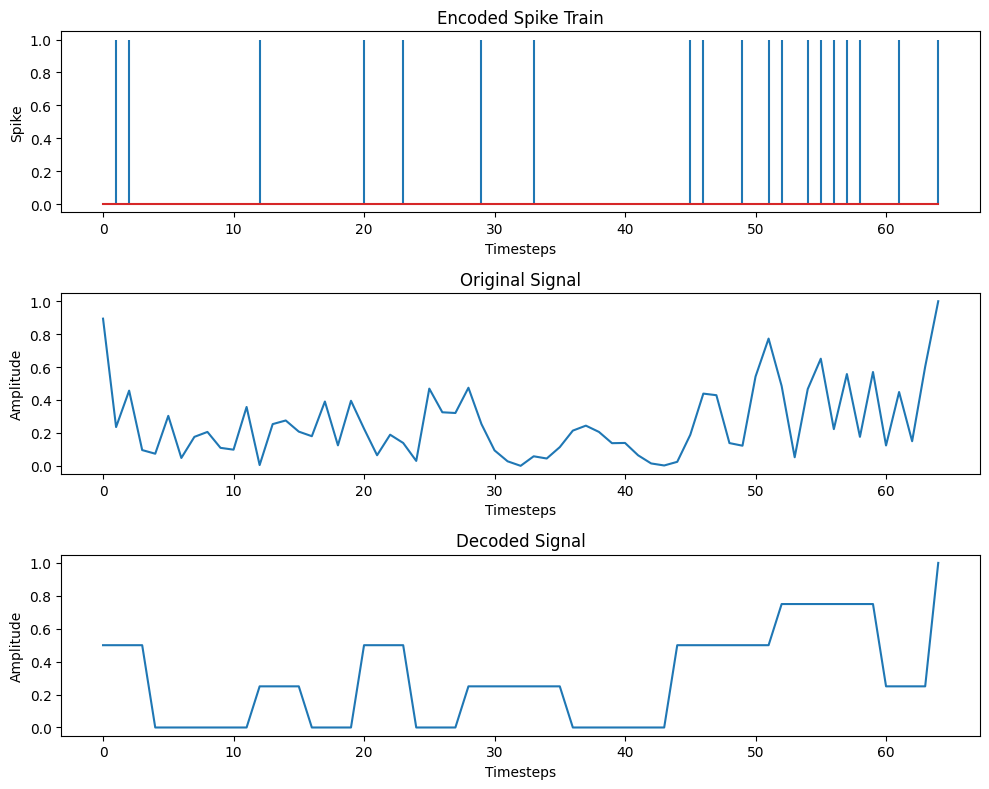

In [86]:
plot_coding(test_data[0,0,0,:], encoded_data[0,0,0,:], decoded_rate[0,0,0,:])

In [87]:
from encoder import StepForwardEncoder

sf_encoder = StepForwardEncoder(threshold=0.19606764001960716, normalize=False)
base = test_data.select(-1, 0).unsqueeze(-1)
encoded_data = sf_encoder.encode(test_data)
decoded_data = sf_encoder.decode(encoded_data, base=base)

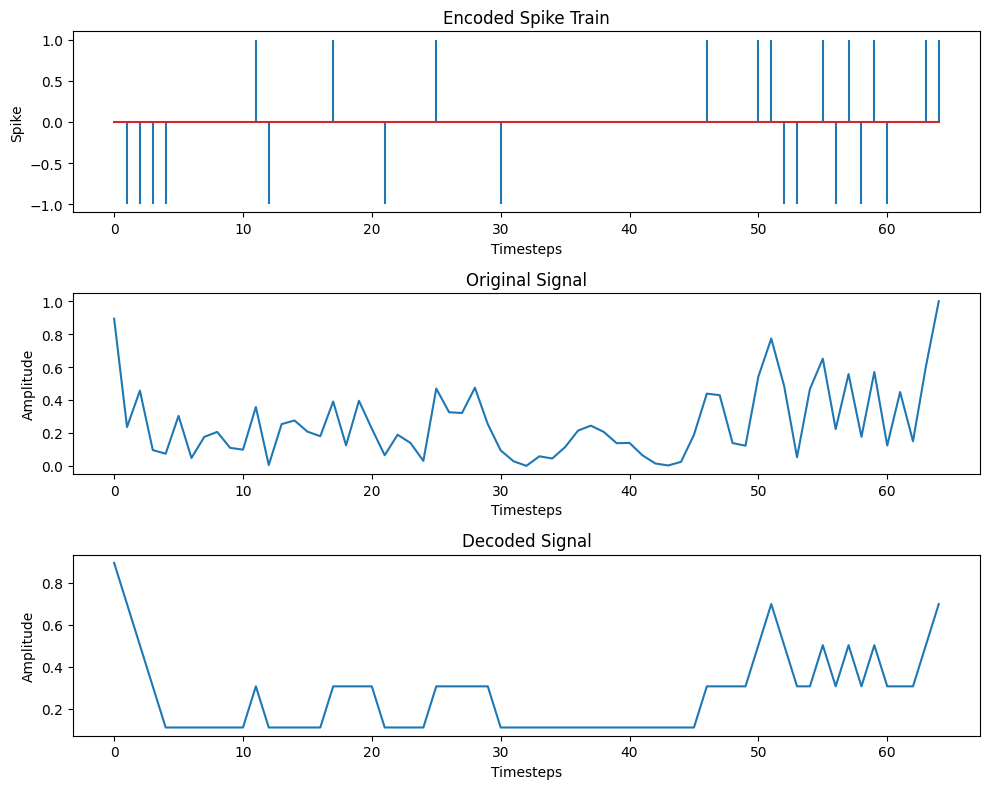

In [88]:
plot_coding(test_data[0,0,0,:], encoded_data[0,0,0,:], decoded_data[0,0,0,:])

In [89]:
from encoder import TBREncoder

tbr_encoder = TBREncoder(threshold=0.40992623011415186, normalize=False)
base, threshold = tbr_encoder.get_decode_parameters(test_data)
encoded_data = tbr_encoder.encode(test_data)
decoded_data = tbr_encoder.decode(encoded_data, base=base, threshold=threshold)

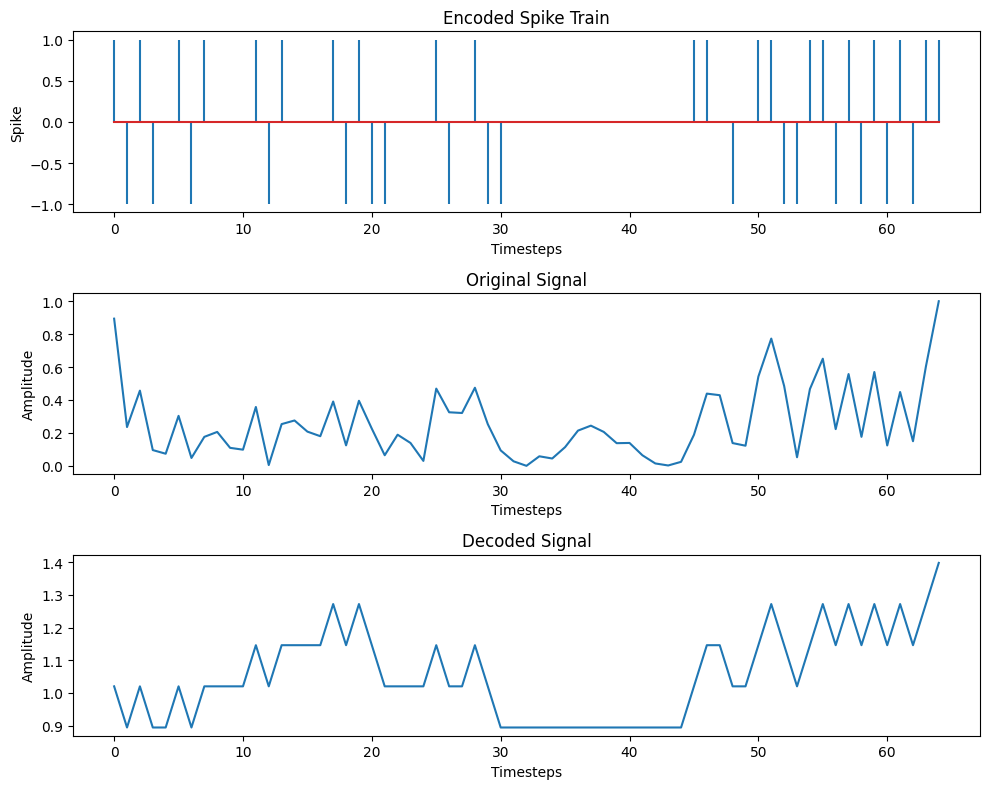

In [90]:
plot_coding(test_data[0,0,0,:], encoded_data[0,0,0,:], decoded_data[0,0,0,:])

In [91]:
from encoder import BSAEncoder

bsa_encoder = BSAEncoder(win_size=6, cutoff=0.15678260630598448, threshold=0.4054443922810268, normalize=False)
encoded_data = bsa_encoder.encode(test_data)
decoded_data = bsa_encoder.decode(encoded_data)

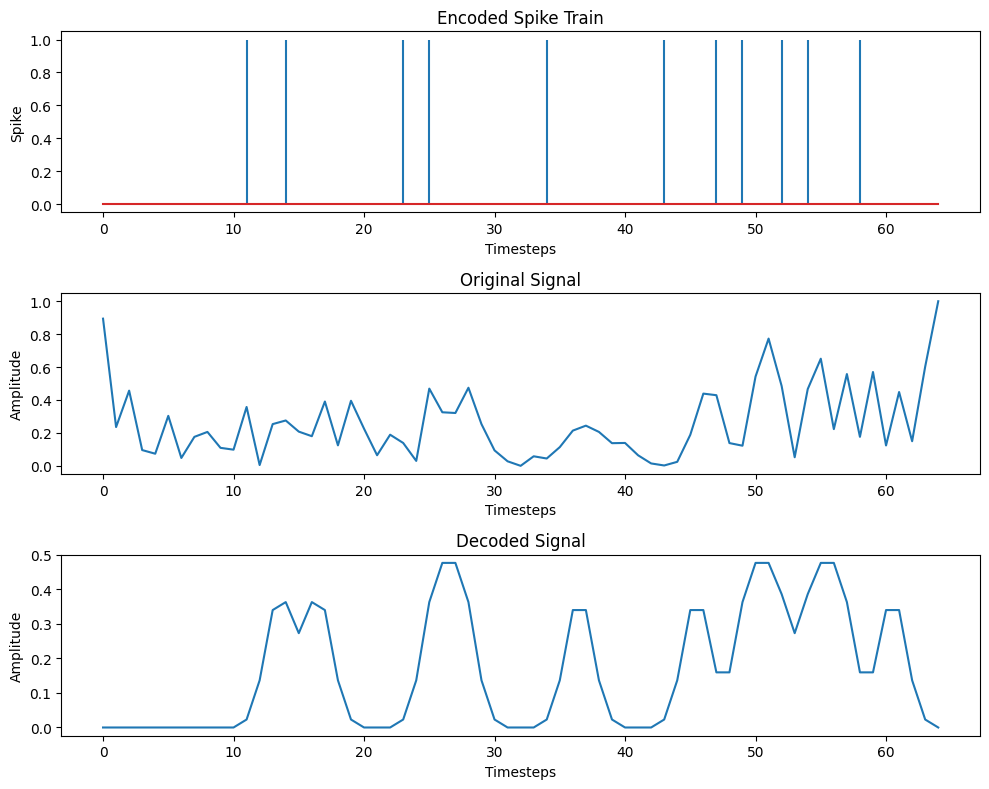

In [92]:
plot_coding(test_data[0,0,0,:], encoded_data[0,0,0,:], decoded_data[0,0,0,:])

In [93]:
from encoder import PhaseEncoderExpand

phase_encoder = PhaseEncoderExpand(phase_window=8, normalize=False)
encoded_data = phase_encoder.encode(test_data)
decoded_data = phase_encoder.decode(encoded_data)

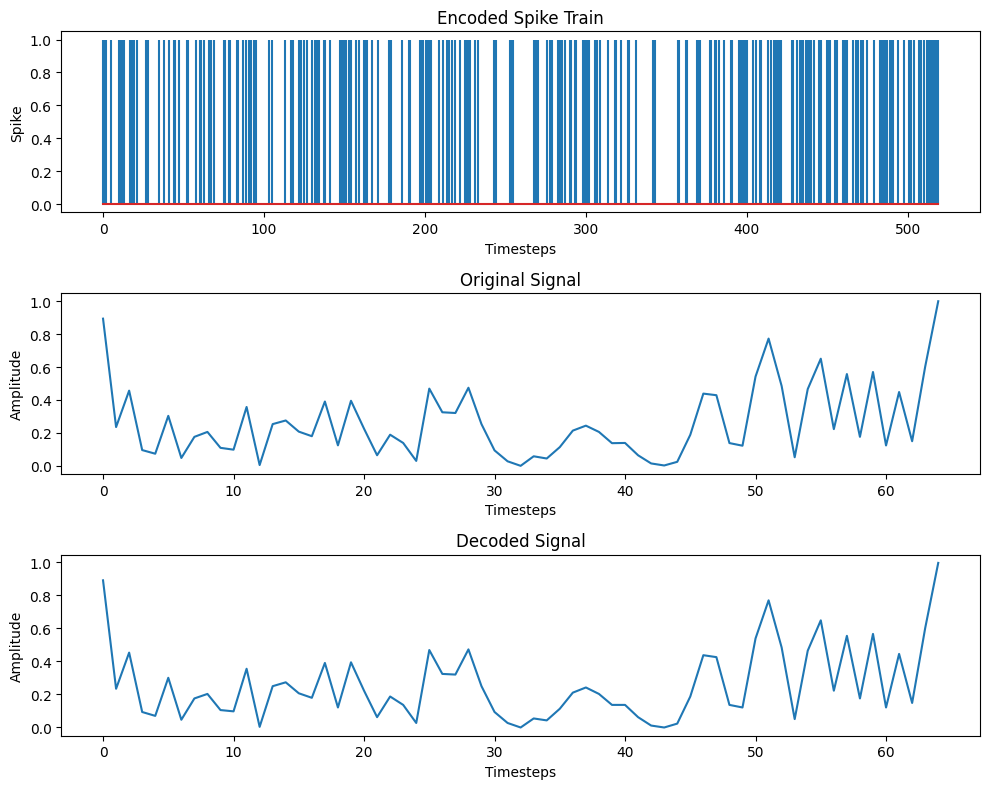

In [94]:
plot_coding(test_data[0,0,0,:], encoded_data[0,0,0,:], decoded_data[0,0,0,:])

In [95]:
from encoder import PhaseEncoder

phase_encoder = PhaseEncoder(phase_window=5, normalize=False)
encoded_data = phase_encoder.encode(test_data)
decoded_data = phase_encoder.decode(encoded_data)

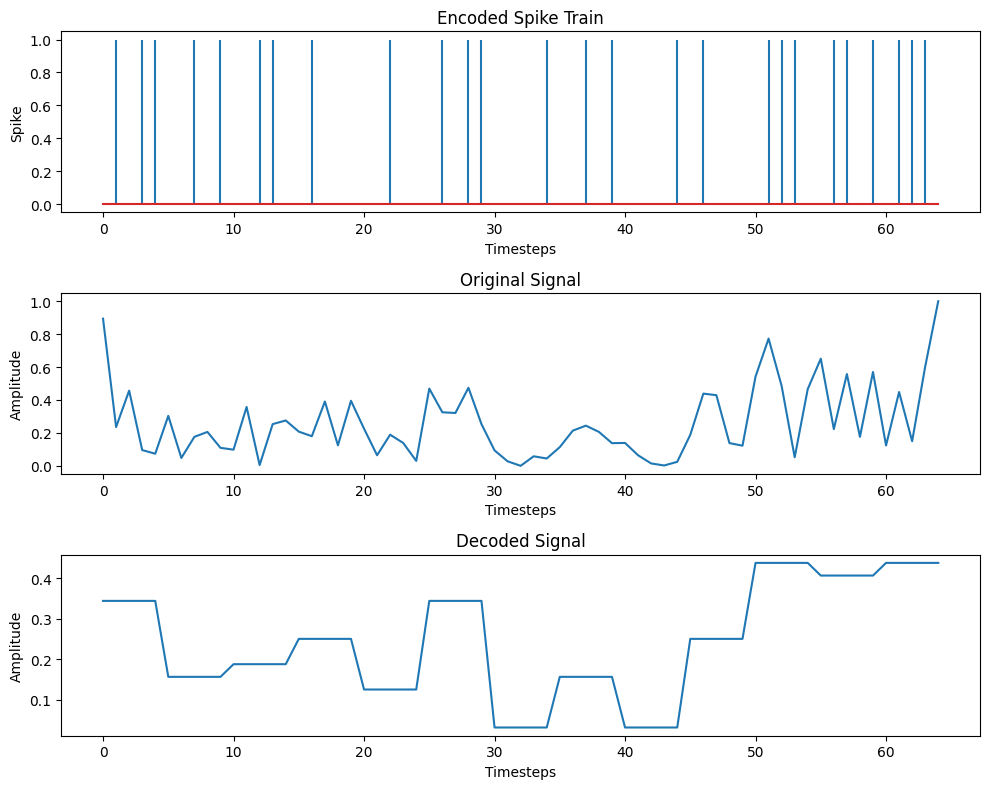

In [96]:
plot_coding(test_data[0,0,0,:], encoded_data[0,0,0,:], decoded_data[0,0,0,:])

In [97]:
from encoder import BurstEncoderExpand

burst_encoder = BurstEncoderExpand(normalize=False)
encoded_data = burst_encoder.encode(test_data)
decoded_data = burst_encoder.decode(encoded_data)

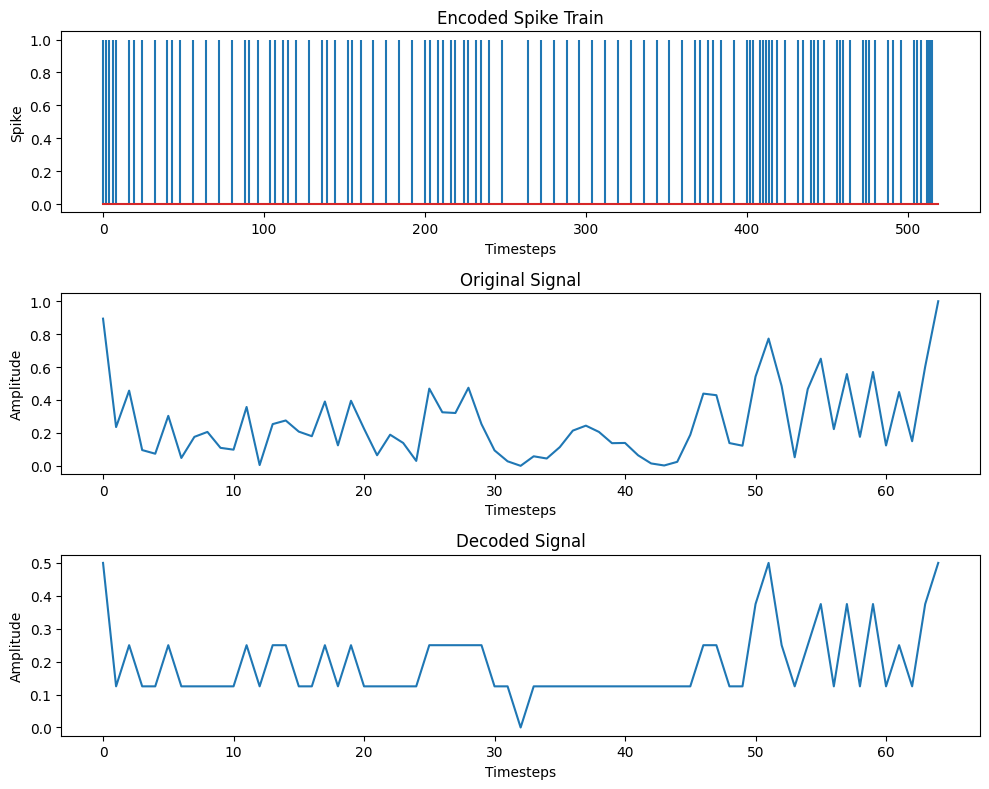

In [98]:
plot_coding(test_data[0,0,0,:], encoded_data[0,0,0,:], decoded_data[0,0,0,:])

In [99]:
from encoder import BurstEncoder

burst_encoder = BurstEncoder(normalize=False)
encoded_data = burst_encoder.encode(test_data)
decoded_data = burst_encoder.decode(encoded_data)

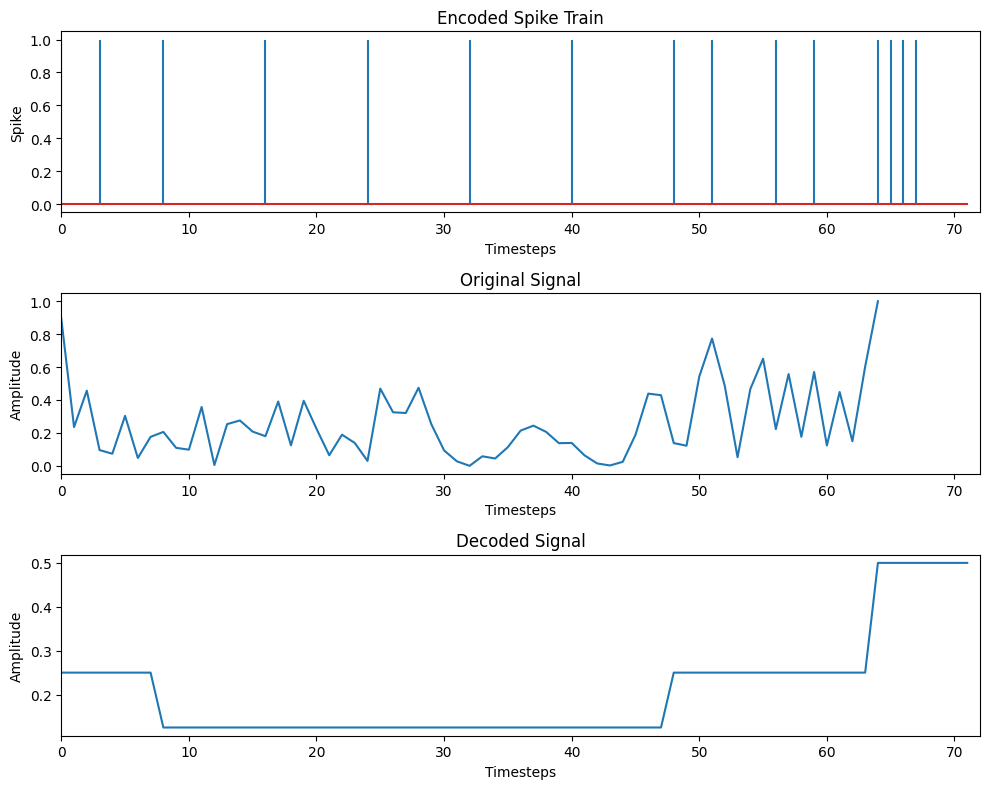

In [104]:
plot_coding(test_data[0,0,0,:], encoded_data[0,0,0,:], decoded_data[0,0,0,:])